# <span style="color:darkblue"> QTM 151 - Assignment 10 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here

print("Robyn Jin")


Robyn Jin


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [1]:
# Write your answer here

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

In this assignment you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).

For this lecture, you will need the material from <br>
Lecture 20 and 22.


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 21.


In [2]:
# Write your own code

exchangerates = pd.read_csv("data_raw/exchangerates.csv")
exchangerates['date_string_dt'] = pd.to_datetime(exchangerates["date_string"], 
                                                format = "%Y, %A, %b %d")


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"

Hint: See Lecture 22 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


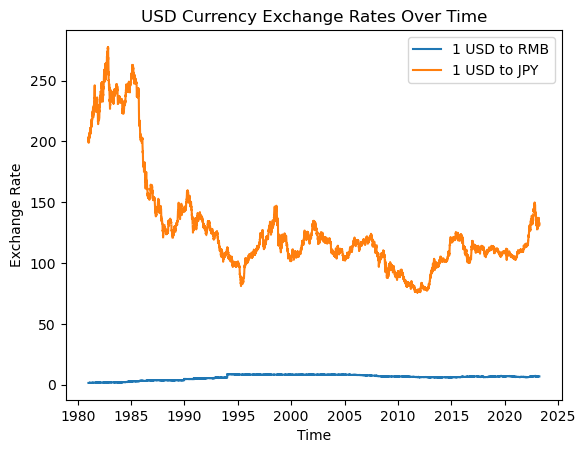

In [7]:
# Write your own code

plt.plot("date_string_dt","usd_to_rmb",
          data = exchangerates)
plt.plot("date_string_dt","usd_to_jpy",
          data = exchangerates)
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.title("USD Currency Exchange Rates Over Time")
plt.legend(labels = ["1 USD to RMB", "1 USD to JPY"])


<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- Create a boolean vector (True/False) "bool_cond" which checks whether <br>
"usd_to_jpy" is below 100
- Generate a line plot with the "usd_to_jpy" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 22 to create a shaded region <br>
for time periods where "bool_cond" is true.



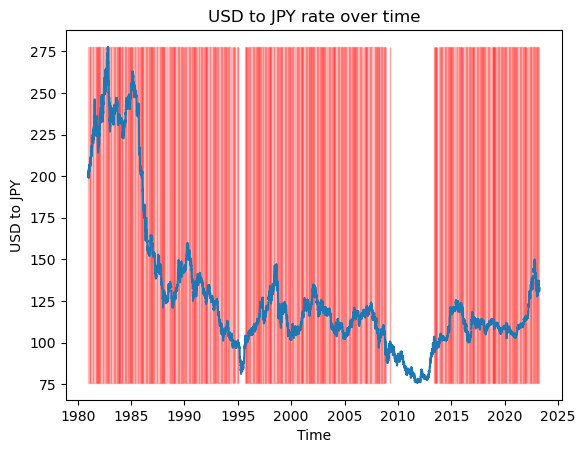

In [11]:
# Write your own code

exchangerates["bool_cond"] = exchangerates["usd_to_jpy"] > 100

plt.plot("date_string_dt","usd_to_jpy",
          data = exchangerates)
plt.xlabel("Time")
plt.ylabel("USD to JPY")
plt.title("USD to JPY rate over time")

vec_y = exchangerates["usd_to_jpy"]
plt.fill_between(x = exchangerates["date_string_dt"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = exchangerates["bool_cond"],
                 alpha = 0.2,color = "red")


<font size = "5">

(d) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Follow the instructions in Lecture 21 to compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [8]:
# Write your own code

month_config = pd.Grouper(key='date_string_dt', freq='m')
exchangerates.groupby(month_config).agg(rmb_std = ("usd_to_rmb","std")).reset_index()


,date_string_dt,rmb_std
0,1981-01-31,0.019149
1,1981-02-28,0.015432
2,1981-03-31,0.012636
3,1981-04-30,0.017154
4,1981-05-31,0.017583
...,...,...
502,2022-11-30,0.077405
503,2022-12-31,0.028203
504,2023-01-31,0.052152
505,2023-02-28,0.067344


<font size = "5">

(e) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset

Hint: See Lecture 22 for details on ```pd.melt()```

In [17]:
# Write your own code

exchangerates_long = pd.melt(exchangerates,
                         var_name = "type",
                         value_name = "exchange_rate",
                         id_vars = "date_string_dt",
                         value_vars = ["usd_to_rmb","usd_to_jpy"])

exchangerates_long


,date_string_dt,type,exchange_rate
0,1981-01-02,usd_to_rmb,1.5341
1,1981-01-05,usd_to_rmb,1.5418
2,1981-01-06,usd_to_rmb,1.5264
3,1981-01-07,usd_to_rmb,1.5264
4,1981-01-08,usd_to_rmb,1.5264
...,...,...,...
22037,2023-03-27,usd_to_jpy,131.4900
22038,2023-03-28,usd_to_jpy,130.9700
22039,2023-03-29,usd_to_jpy,132.6900
22040,2023-03-30,usd_to_jpy,132.7100
